50
50


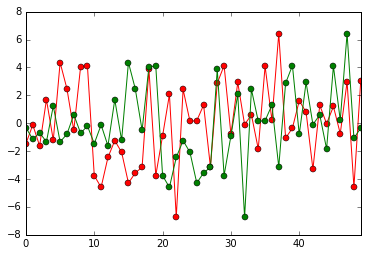

In [2]:
%matplotlib inline
# Done to load packages from lower directory
import os
os.chdir("../..")

import pandas as pd
import numpy as np
from tsa import cross_correlation, cross_correlogram

m = 50
d = 10


a = 3 * np.random.randn(m)

X = pd.Series(a, dtype=float)
Y = pd.Series(np.concatenate([np.random.randn(d),a]), dtype=float)[:m]
n = len(X)

print len(X)
print len(Y)
X.plot(style="ro-")
Y.plot(style="go-")

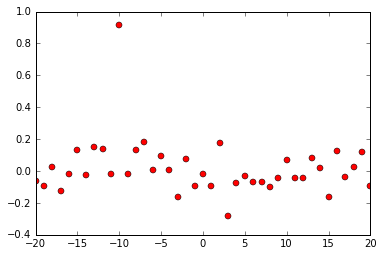

In [3]:
lag_limit = 2 * d
lags = range(-lag_limit, lag_limit+1)

cc_gram = cross_correlogram(X, Y, lags)
cc_gram.plot(style="ro")



In [4]:
from helpers import entrainment

l_xy, e_xy, l_yx, e_yx = entrainment(X, Y)

print "X --> Y : %.4f" % e_xy
print "Y --> X : %.4f" % e_yx


X --> Y : 0.9169
Y --> X : -0.2830


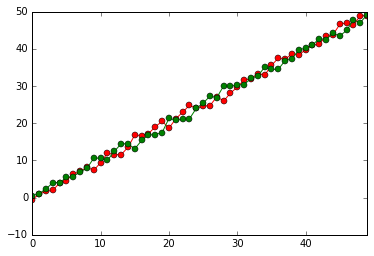

In [5]:
m = 50

T = range(m)

Z = np.random.randn(m)

A = pd.Series(T + Z)
B = pd.Series(T - Z)

A.plot(style="ro-")
B.plot(style="go-")

Como vemos, el proceso no es estacionario: es una función lineal a la cual se le agrega un ruido blanco...

Veamos qué nos da el correlograma cruzado:

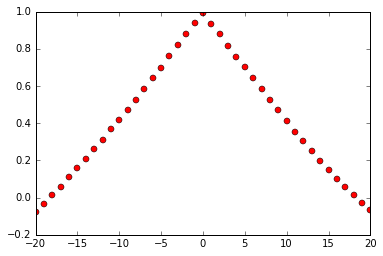

In [6]:
cross_correlogram(A, B, lags).plot(style="ro")

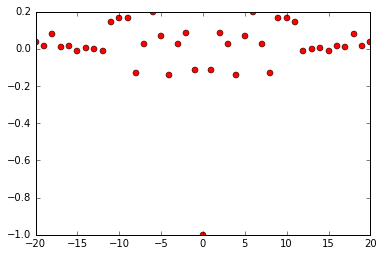

In [7]:
cross_correlogram(A - T, B - T, lags).plot(style="ro")

Como era de esperarse, hay una correlación de -1 en el lag 0
